In [55]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
#predict whether the client will subscribe (1/0) to a term deposit
df = pd.read_csv("banking.csv")
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [57]:
df.describe()


,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [58]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [59]:
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [60]:
df['education']=np.where(df['education'] =='basic.9y', 'Basic', df['education'])
df['education']=np.where(df['education'] =='basic.6y', 'Basic', df['education'])
df['education']=np.where(df['education'] =='basic.4y', 'Basic', df['education'])
df['education'].value_counts()


Basic                  12513
university.degree      12168
high.school             9515
professional.course     5243
unknown                 1731
illiterate                18
Name: education, dtype: int64

C:\Users\pragy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y', ylabel='count'>

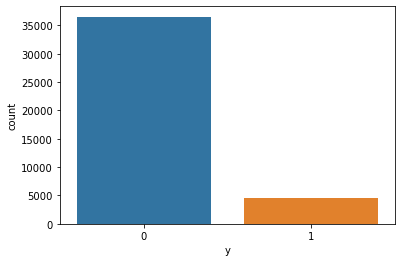

In [61]:
sns.countplot(df['y'])

In [62]:
df['y'].value_counts()
df.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


<AxesSubplot:>

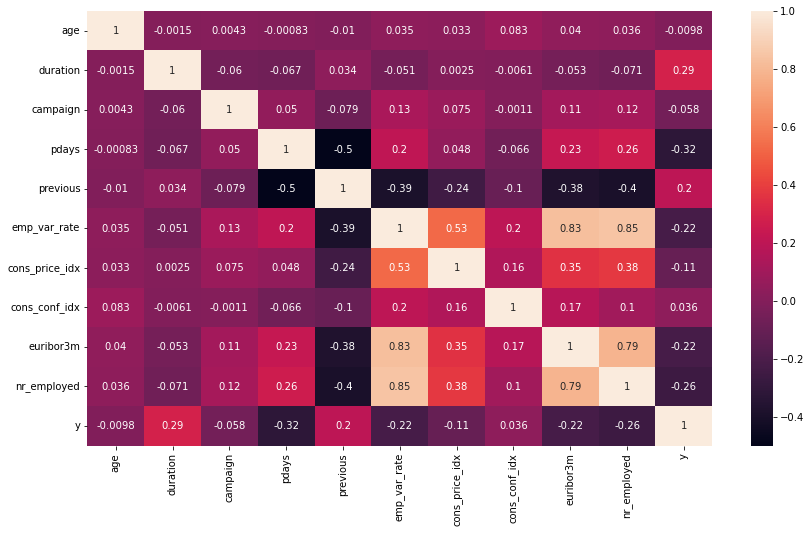

In [63]:
corr = df.corr(method='kendall') 
plt.figure(figsize=(14,8))
sns.heatmap(corr, annot=True)

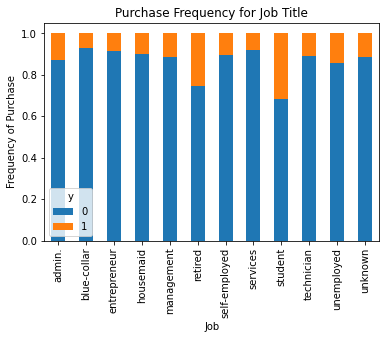

In [64]:
plt.figure(figsize=(14,8))
%matplotlib inline
table= pd.crosstab(df.job,df.y)
prob = table.div(table.sum(1).astype(float),axis = 0)
prob.plot(kind ='bar',stacked = True)
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

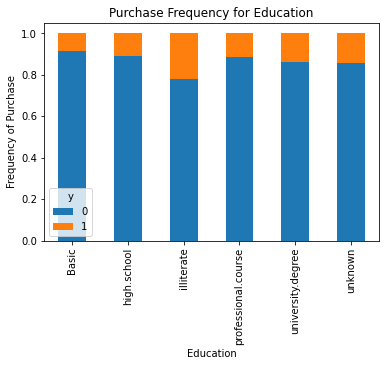

In [65]:
plt.figure(figsize=(14,8))
%matplotlib inline
table= pd.crosstab(df.education,df.y)
prob = table.div(table.sum(1).astype(float),axis = 0)
prob.plot(kind ='bar',stacked = True)
plt.title('Purchase Frequency for Education')
plt.xlabel('Education')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_edu')

In [66]:
#stacked plot provide us better information 


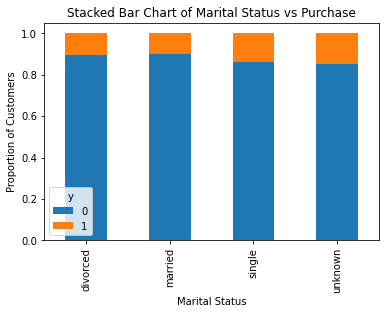

In [67]:
table=pd.crosstab(df.marital,df.y)
prob= table.div(table.sum(1).astype(float),axis = 0)
prob.plot(kind ='bar',stacked = True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('marital_vs_pur_stack')


<AxesSubplot:>

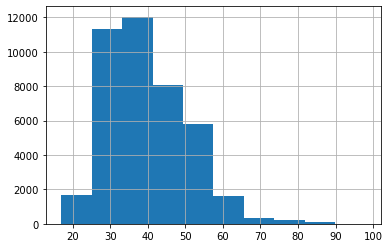

In [68]:
df.age.hist()

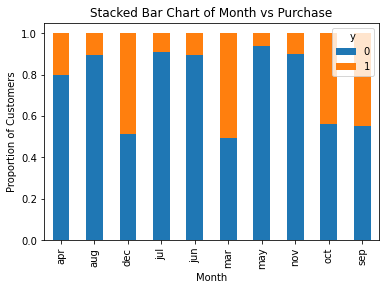

In [69]:
table=pd.crosstab(df.month,df.y)
prob= table.div(table.sum(1).astype(float),axis = 0)
prob.plot(kind ='bar',stacked = True)
plt.title('Stacked Bar Chart of Month vs Purchase')
plt.xlabel('Month')
plt.ylabel('Proportion of Customers')
plt.savefig('month_vs_pur_stack')


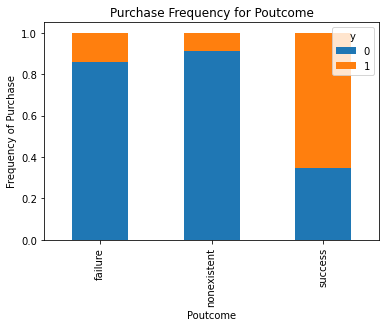

In [70]:
table = pd.crosstab(df.poutcome,df.y)
prob= table.div(table.sum(1).astype(float),axis = 0)
prob.plot(kind ='bar',stacked = True)
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')

In [71]:
#Create dummy variables - data transformation
#one example to understand in detail

onehotencoder = preprocessing.OneHotEncoder()
#reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
X = onehotencoder.fit_transform(df.job.values.reshape(-1,1)).toarray()
#To add this back into the original dataframe 
dfOneHot = pd.DataFrame(X, columns = ["job_"+str(int(i)) for i in range(X.shape[1])]) 
df = pd.concat([df, dfOneHot], axis=1)


In [72]:
#droping the country column 
df= df.drop(['job'], axis=1) 
#printing to verify 
print(df.head())



   age  marital          education  default housing loan   contact month  \
0   44  married              Basic  unknown     yes   no  cellular   aug   
1   53  married            unknown       no      no   no  cellular   nov   
2   28   single  university.degree       no     yes   no  cellular   jun   
3   39  married        high.school       no      no   no  cellular   apr   
4   55  married              Basic       no     yes   no  cellular   aug   

  day_of_week  duration  ...  job_2  job_3  job_4 job_5  job_6  job_7  job_8  \
0         thu       210  ...    0.0    0.0    0.0   0.0    0.0    0.0    0.0   
1         fri       138  ...    0.0    0.0    0.0   0.0    0.0    0.0    0.0   
2         thu       339  ...    0.0    0.0    1.0   0.0    0.0    0.0    0.0   
3         fri       185  ...    0.0    0.0    0.0   0.0    0.0    1.0    0.0   
4         fri       137  ...    0.0    0.0    0.0   1.0    0.0    0.0    0.0   

   job_9  job_10  job_11  
0    0.0     0.0     0.0  
1    1.0

In [73]:
df.select_dtypes(include=object).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   marital      41188 non-null  object
 1   education    41188 non-null  object
 2   default      41188 non-null  object
 3   housing      41188 non-null  object
 4   loan         41188 non-null  object
 5   contact      41188 non-null  object
 6   month        41188 non-null  object
 7   day_of_week  41188 non-null  object
 8   poutcome     41188 non-null  object
dtypes: object(9)
memory usage: 2.8+ MB


In [74]:
cat_vars=['marital','education','default','housing','loan','contact','month','day_of_week','poutcome']

for i in cat_vars:
    X = onehotencoder.fit_transform(df[i].values.reshape(-1,1)).toarray()
    dfOneHot = pd.DataFrame(X, columns = [str(i)+str(int(j)) for j in range(X.shape[1])]) 
    df = pd.concat([df, dfOneHot], axis=1)
    df= df.drop([str(i)], axis=1)



In [75]:
df.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month8,month9,day_of_week0,day_of_week1,day_of_week2,day_of_week3,day_of_week4,poutcome0,poutcome1,poutcome2
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [76]:
X = df.loc[:, df.columns != 'y']
y = df.loc[:, df.columns == 'y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=353)

In [85]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

y_train.value_counts()



y
0    25631
1     3200
dtype: int64

In [86]:
undersample = RandomUnderSampler(sampling_strategy='majority')
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)
print("After undersampling: ", y_train_under.value_counts())

After undersampling:  y
0    3200
1    3200
dtype: int64


In [91]:
from sklearn.feature_selection import RFE

logreg = LogisticRegression()
rfe = RFE(logreg)
rfe = rfe.fit(X_train_under, y_train_under.values.ravel())


#ravel converts column vector to an array(row)







C:\Users\pragy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\pragy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\pragy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\pragy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([False, False, False, False,  True, False, False, False,  True,
       False, False, False, False, False,  True,  True,  True, False,
        True, False,  True, False,  True,  True,  True, False,  True,
        True, False,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True, False,  True,  True, False,  True, False,  True,
        True, False, False, False,  True, False,  True])

In [132]:
#A = pd.DataFrame(np.array(df.columns),np.array(rfe.support_),columns = ['col', 'bool'])
col =np.array(df.columns)
col = np.delete(col, np.where(col == 'y'))
bool =np.array(rfe.support_)
A = pd.DataFrame({'col':col,'bool':bool}, columns = ['col','bool'])
c = np.array(A['col'].where(A['bool'] == True)).astype(np.str)
c = np.delete(c, np.where(c == 'nan'))
print(c)

['previous' 'euribor3m' 'job_4' 'job_5' 'job_6' 'job_8' 'job_10'
 'marital0' 'marital1' 'marital2' 'education0' 'education1' 'education3'
 'education4' 'education5' 'default0' 'default1' 'contact0' 'contact1'
 'month0' 'month1' 'month2' 'month3' 'month5' 'month6' 'month8'
 'day_of_week0' 'day_of_week1' 'poutcome0' 'poutcome2']


C:\Users\pragy\AppData\Local\Temp/ipykernel_17172/1777233416.py:6: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c = np.array(A['col'].where(A['bool'] == True)).astype(np.str)


In [133]:
X = df.loc[:, c]
y = df.loc[:, df.columns == 'y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=353)

In [134]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.281102
         Iterations: 35


C:\Users\pragy\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.201     
Dependent Variable:  y                 AIC:               23216.0379
Date:                2022-03-01 20:33  BIC:               23474.8150
No. Observations:    41188             Log-Likelihood:    -11578.   
Df Model:            29                LL-Null:           -14499.   
Df Residuals:        41158             LLR p-value:       0.0000    
Converged:           0.0000            Scale:             1.0000    
No. Iterations:      35.0000                                        
--------------------------------------------------------------------
              Coef.    Std.Err.    z     P>|z|    [0.025     0.975] 
--------------------------------------------------------------------
previous       0.2071    0.0510   4.0630 0.0000     0.1072    0.3070
euribor3m     -0.5019    0.0135 -37.0588 0.0000    -0.5285   -0.4754
job_4         -0.0391    0.0705  -0.5543 0.5794    -0.1773   

In [ ]:
c = np.delete(c, np.where(c == 'job_4'))
c = np.delete(c, np.where(c == 'job_6'))
c = np.delete(c, np.where(c == 'job_10'))
c = np.delete(c, np.where(c == 'job_4'))

In [90]:
y_pred = logreg.predict(X_test) 
print('Accuracy on test set: {}'.format(logreg.score(X_test, y_test)))
print(logreg.intercept_,logreg.coef_)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

Accuracy on test set: 0.8500445091850772
[0.00382971] [[ 0.0070117   0.00690829  0.09181442 -0.00130473 -0.09775609 -0.39492661
   0.32886762  0.03324783 -0.30456594 -0.00596172  0.0616959  -0.15963864
  -0.01234167 -0.00052926  0.00073868  0.05684418  0.00932636 -0.04490996
   0.04466998  0.03000145  0.01502452  0.00294115 -0.00244895 -0.08537738
   0.09100372  0.00064529 -0.13045587 -0.0657985   0.0020485   0.03529005
   0.15157612  0.01116236  0.13406    -0.13023733  0.          0.0176818
   0.00789074 -0.02174987  0.02198658  0.00789074 -0.02605464  0.12176907
  -0.11794639  0.08936505  0.04063287 -0.00173582  0.05386129  0.05672217
   0.1262754  -0.42792665 -0.00464533  0.05654317  0.01473052 -0.00048887
  -0.03600849 -0.0071895   0.03310882  0.0144007  -0.1110833   0.10384332
   0.01106265]]


In [54]:
predictions = y_pred
error=pd.DataFrame(np.array(y_test).flatten(),columns=['actual'])
error['prediction']=np.array(predictions)
error.value_counts()

actual  prediction
0       0             9245
        1             1672
1       1             1259
        0              181
dtype: int64